In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("mall customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df = df.drop ("CustomerID", axis=1)

In [5]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
df = df.rename(columns = {'Gender' : 'gender', 'Age' : 'age', 'Annual Income (k$)' : 'income', 'Spending Score (1-100)': 'score'}) 

In [7]:
df.head()

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
df1 = df.copy()
df2 = df.copy()

In [9]:
df.shape

(200, 4)

In [10]:
df.describe()

,age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


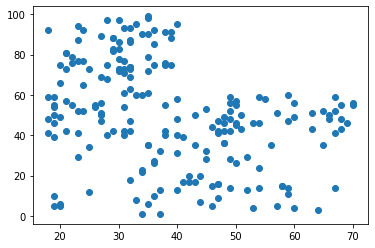

In [11]:
plt.scatter (df.age, df.score)

Text(0.5, 1.0, 'Demographic Value of people')

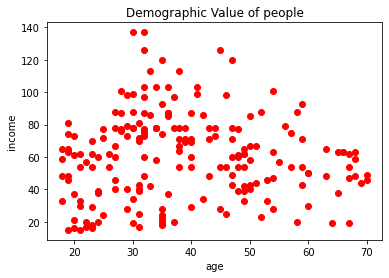

In [12]:
plt.scatter (df.age, df.income, color = 'red')
plt.xlabel ("age")
plt.ylabel ('income')
plt.title ('Demographic Value of people')

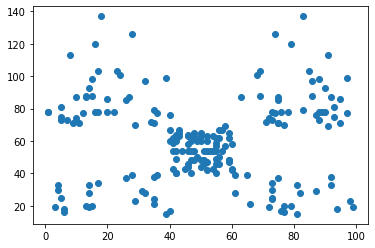

In [13]:
plt.scatter (df.score, df.income)

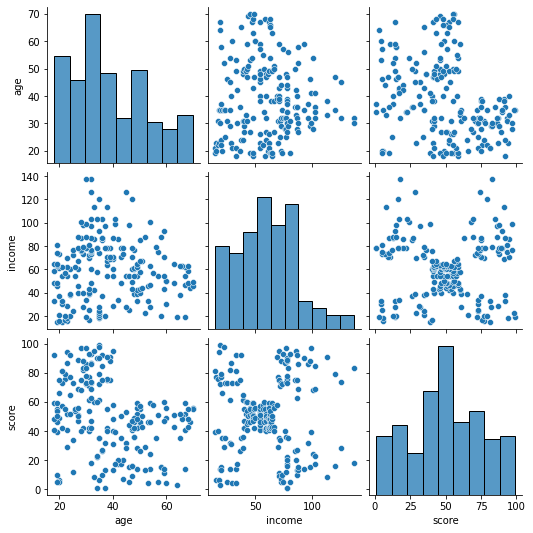

In [14]:
sns.pairplot(df[['age', 'income', 'score']])

Text(0.5, 1.0, 'Demographic Value of people')

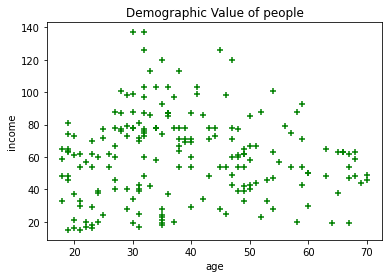

In [15]:
plt.scatter (df.age, df.income, color = 'green', marker = "+")
plt.xlabel ("age")
plt.ylabel ('income')
plt.title ('Demographic Value of people')

In [16]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans

In [17]:
! pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [18]:
from sklearn.cluster import KMeans

In [19]:
km = KMeans(n_clusters=8)

In [20]:
km.fit (df[['score', 'income']])

KMeans()

In [21]:
km.predict (df[['score', 'income']])

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 7, 4, 7, 7,
       2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 6, 0, 6, 5, 6, 5, 6,
       0, 6, 5, 6, 5, 6, 5, 6, 5, 6, 0, 6, 5, 6, 0, 6, 5, 6, 5, 6, 5, 6,
       5, 6, 5, 6, 5, 6, 0, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6,
       5, 6, 5, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [22]:
df ['new_cluster1'] = km.predict (df[['score', 'income']])

In [23]:
df.head()

,gender,age,income,score,new_cluster1
0,Male,19,15,39,2
1,Male,21,15,81,4
2,Female,20,16,6,2
3,Female,23,16,77,4
4,Female,31,17,40,2


In [24]:
df1 = df [df.new_cluster1 ==1]

In [25]:
df1.head()

,gender,age,income,score,new_cluster1
179,Male,35,93,90,1
181,Female,32,97,86,1
183,Female,29,98,88,1
185,Male,30,99,97,1
187,Male,28,101,68,1


Text(0.5, 1.0, 'Demographic Value of people')

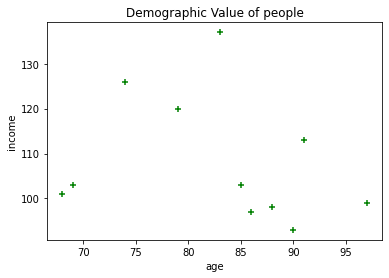

In [26]:
plt.scatter (df1.score, df1.income, color = 'green', marker = "+")
plt.xlabel ("age")
plt.ylabel ('income')
plt.title ('Demographic Value of people')

NameError: name 'centroid' is not defined

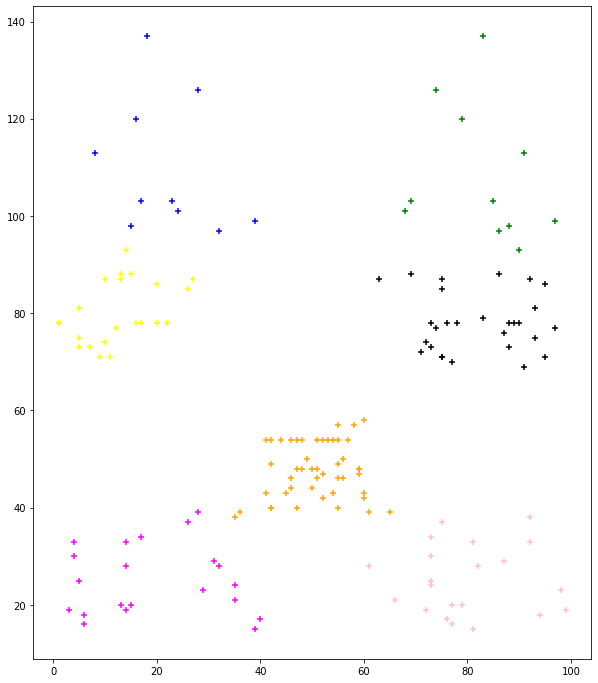

In [27]:
df1 = df [df.new_cluster1 ==1]
df2 = df [df.new_cluster1 ==2]
df3 = df [df.new_cluster1 ==3]
df4 = df [df.new_cluster1 ==4]
df5 = df [df.new_cluster1 ==5]
df6 = df [df.new_cluster1 ==6]
df7 = df [df.new_cluster1 ==7]
df8 = df [df.new_cluster1 ==8]

plt.figure (figsize = (10,12))
plt.scatter (df1.score, df1.income, color = 'green', marker = "+", label= 'cluster 1')
plt.scatter (df2.score, df2.income, color = 'magenta', marker = "+", label= 'cluster 2')
plt.scatter (df3.score, df3.income, color = 'blue', marker = "+", label= 'cluster 3')
plt.scatter (df4.score, df4.income, color = 'pink', marker = "+", label= 'cluster 4')
plt.scatter (df5.score, df5.income, color = 'yellow', marker = "+", label= 'cluster 5')
plt.scatter (df6.score, df6.income, color = 'black', marker = "+", label= 'cluster 6')
plt.scatter (df7.score, df7.income, color = 'orange', marker = "+", label= 'cluster 7')
plt.scatter (df8.score, df8.income, color = 'cyan', marker = "+", label= 'cluster 8')

plt.scatter(centroid[:, 0], centroid[:, 1], color='red', marker='o', label='Centroids')

plt.xlabel ("score")
plt.ylabel ('income')
plt.title ('Demographic Value of people')
plt.legend()
plt.show()

In [30]:
km2 = KMeans(n_clusters=5)

In [31]:
km2.fit (df[['score', 'income']])

KMeans(n_clusters=5)

In [32]:
df ['optimize_cluster'] = km.predict (df[['score', 'income']])

In [33]:
df.head()

,gender,age,income,score,new_cluster1,optimize_cluster
0,Male,19,15,39,2,2
1,Male,21,15,81,4,4
2,Female,20,16,6,2,2
3,Female,23,16,77,4,4
4,Female,31,17,40,2,2


In [34]:
center2 = km2.cluster_centers_
center2

array([[79.36363636, 25.72727273],
       [49.51851852, 55.2962963 ],
       [82.12820513, 86.53846154],
       [17.11428571, 88.2       ],
       [20.91304348, 26.30434783]])

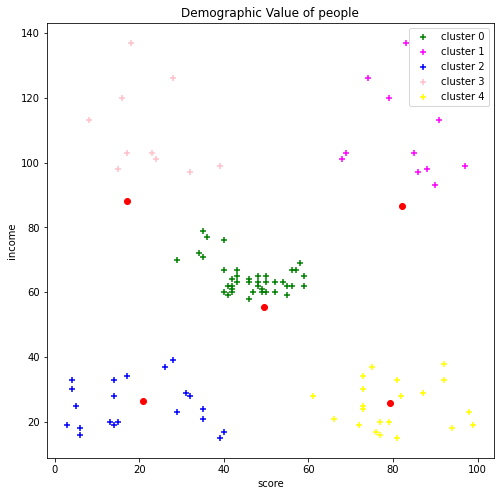

In [35]:
df0 = df [df.optimize_cluster ==0]
df1 = df [df.optimize_cluster ==1]
df2 = df [df.optimize_cluster ==2]
df3 = df [df.optimize_cluster ==3]
df4 = df [df.optimize_cluster ==4]


plt.figure (figsize = (8,8))
plt.scatter (df0.score, df0.income, color = 'green', marker = "+", label= 'cluster 0')
plt.scatter (df1.score, df1.income, color = 'magenta', marker = "+", label= 'cluster 1')
plt.scatter (df2.score, df2.income, color = 'blue', marker = "+", label= 'cluster 2')
plt.scatter (df3.score, df3.income, color = 'pink', marker = "+", label= 'cluster 3')
plt.scatter (df4.score, df4.income, color = 'yellow', marker = "+", label= 'cluster 4')

plt.scatter(center2[:,0], center2[:,1], color="red", marker='o')

plt.xlabel ("score")
plt.ylabel ('income')
plt.title ('Demographic Value of people')
plt.legend()
plt.show()